# Detrending Light Curve Data

In [3]:
import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
plt.rc('font', family='serif')


ttvs_df = pd.read_csv('times_input.txt', sep='\t')

epochs = ttvs_df['epoch']
times = ttvs_df['time']
times_err = ttvs_df['time_err']

times_err = times_err[:-1]

koi3678_period = 160.883840387890871
koi3678_t0 = 277+0.506160949430603635


linear_ephemeris = []
for epoch in epochs:
    linear_ephemeris.append(koi3678_t0+(epoch*koi3678_period))


ttvs=[]
for ii in range(0, len(epochs)-1):
    ttvs.append((times[ii]-linear_ephemeris[ii])*24*60)

        
        


In [10]:
#from https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/807/170
holczer_slopes = [
    -130.0,
    -107.0,
     139.0,
    -774.0,
      88.0,
    -632.0,
    -406.0,
     346.0
]

holczer_slopes_err = [
    29.,
    26.,
    22.,
    18.,
    21.,
    18.,
    36.,
    26.
]

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_64530/1160575582.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


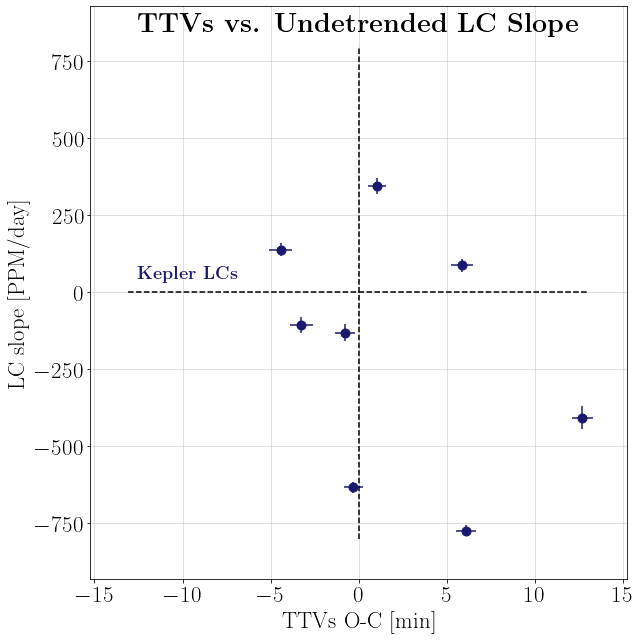

In [15]:
fig, ax = plt.subplots(figsize = [9, 9])

plt.grid(visible=True, alpha=0.5)
min_x, max_x = np.abs(np.min(ttvs)), np.max(ttvs)
if min_x>max_x:
    x_range=min_x*1.2
else:
    x_range=max_x*1.2
    
min_y, max_y = np.abs(np.min(holczer_slopes)), np.max(holczer_slopes)
if min_y>max_y:
    y_range=min_y*1.2
else:
    y_range=max_y*1.2




ax.errorbar(ttvs, holczer_slopes, xerr=times_err*24.*60., yerr = holczer_slopes_err, 
            color = '#191970', marker = 'o', ls='', ms=9)

ax.set_xlabel('TTVs O-C [min]', fontsize = 23)
ax.set_ylabel('LC slope [PPM/day]', fontsize = 23)

ax.axhline(0,.07,.93,color='k',ls='--')
ax.axvline(0,.07,.93,color='k',ls='--')

ax.set_xlim(-x_range, x_range)
ax.set_ylim(-y_range, y_range)

ax.annotate(r"\textbf{Kepler LCs}", xy=(0.18, 0.5), weight='bold',
            xycoords="axes fraction", xytext=(0, 10), fontsize=18,
            textcoords="offset pixels", ha="center", va="bottom", color='#191970')

ax.annotate(r"\textbf{TTVs vs. Undetrended LC Slope}", xy=(0.5, .93), weight='bold',
            xycoords="axes fraction", xytext=(0, 10), fontsize=27,
            textcoords="offset pixels", ha="center", va="bottom")

fig.tight_layout()


fig.savefig('starspot_ttvs_kepler.pdf')

fig.show()






